# Testing the Calculation Without Parameter Uncertanties

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import h5py
import model
import multiprocessing as multi
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [21]:
with h5py.File('observations.h5', 'r') as f:
    Nobs, Tobs = f.attrs['5yr']
    Nobs = int(round(Nobs))
    m1s = array(f['m1s'])[:Nobs]
    m2s = array(f['m2s'])[:Nobs]
    zs = array(f['zs'])[:Nobs]
    dls = Planck15.luminosity_distance(zs).to(u.Gpc).value[:Nobs]    

In [4]:
with h5py.File('selected.h5', 'r') as f:
    m1s_det = array(f['m1det'])
    m2s_det = array(f['m2det'])
    dls_det = array(f['dl'])
    wts_det = array(f['wt'])
    N_gen = f.attrs['N_gen']

I got convergence with the ``small`` sample for ``1 << 13`` and ``1 << 14`` below.  Moving to 1 year, we have 12 times as many samples, so we should increase by 16 ($2^4$), or 17 and 18.  In fact, we see convergence in 1 year at ``1 << 18`` and ``1 << 19``.  That suggests that we might have convergence at 5 years by ``1 << 20`` and ``1 << 21``.

In [5]:
ndet = 1 << 20
fdet = float(ndet)/float(m1s_det.shape[0])
mod1 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [7]:
ndet = 1 << 21
fdet = float(ndet)/float(m1s_det.shape[0])
mod2 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [8]:
d0 = {mod1.R0: 100.0,
      mod1.alpha: 0.75,
      mod1.beta: 0.0,
      mod1.gamma: 3.0,
      mod1.MMin: 5.0,
      mod1.MMax: 40.0,
      mod1.sigma_low: 0.1,
      mod1.sigma_high: 0.1,
      mod1.H0: 70,
      mod1.Om: 0.3,
      mod1.w: -1}

In [10]:
m1s.shape[0], mod1.mu_N_det.eval(d0), mod1.sigma_N_det.eval(d0), mod1.neff_det.eval(d0)

(4507, array([4513.65905779]), array([9.90470964]), array([207670.1157415]))

In [11]:
t1 = model.sample(mod1, 1000, 1000, 3)
t2 = model.sample(mod2, 1000, 1000, 3)

Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 81/81 [41:05<00:00, 84.96s/draws]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 156/156 [2:05:39<00:00, 81.91s/draws]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 306/306 [39:16<00:00,  9.87s/draws]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 606/606 [1:12:15<00:00, 11.12s/draws]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, 

ValueError: Not enough samples to build a trace.

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d650cb128>,
      dtype=object)

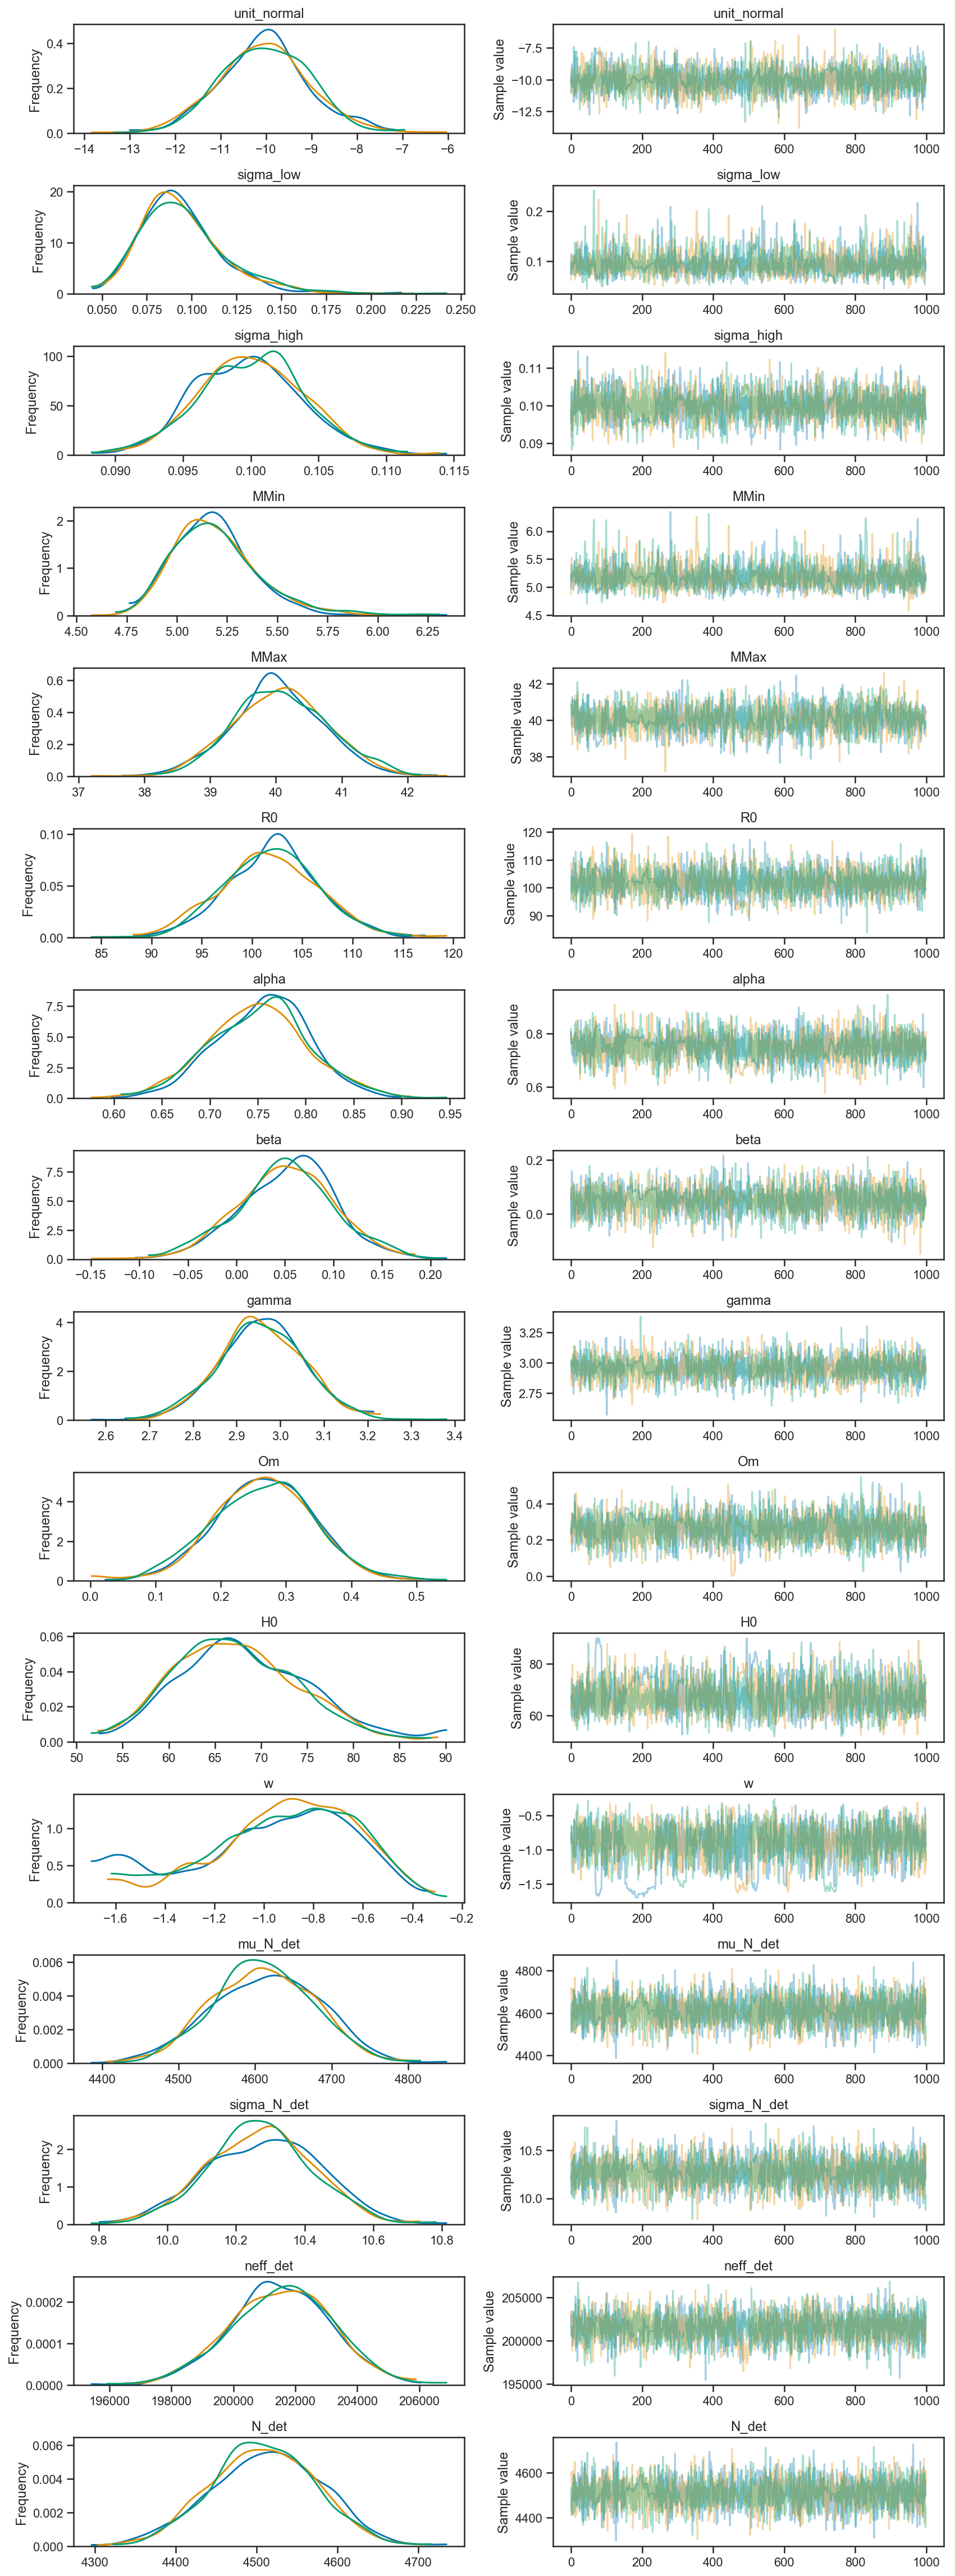

In [12]:
pm.traceplot(t1)

In [14]:
pm.summary(t1)

mean           sd   mc_error        hpd_2.5  \
unit_normal        -10.044619     0.976472   0.025789     -11.918158   
sigma_low            0.094783     0.023605   0.000683       0.054887   
sigma_high           0.099921     0.003853   0.000104       0.092019   
MMin                 5.190752     0.212500   0.005768       4.817588   
MMax                40.048526     0.704610   0.020134      38.594749   
R0                 101.884401     4.606315   0.126488      93.007691   
alpha                0.752067     0.050219   0.001455       0.647916   
beta                 0.051181     0.048702   0.001211      -0.042931   
gamma                2.956341     0.095820   0.002676       2.755513   
Om                   0.264994     0.075962   0.002033       0.120709   
H0                  67.598507     6.873028   0.258617      54.748848   
w                   -0.937839     0.307629   0.016812      -1.614634   
mu_N_det__0       4611.026722    67.227983   1.521158    4480.326297   
sigma_N_det__0      10.271962     0.154664   0.003492       9.973278   
neff_det__0     201515.606358  1621.912206  43.296068  198313.257512   
N_det__0          4508.977903    64.726436   1.449230    4383.785275   

                     hpd_97.5        n_eff      Rhat  
unit_normal         -8.070156  1391.836669  0.999753  
sigma_low            0.142502  1137.013635  1.000320  
sigma_high           0.107013  1417.786616  1.000243  
MMin                 5.599188  1386.053588  1.000496  
MMax                41.364373  1425.955719  1.000680  
R0                 110.817208  1094.216339  1.000641  
alpha                0.847492  1069.196011  1.001296  
beta                 0.151180  1663.910829  1.000369  
gamma                3.132947  1170.624760  0.999548  
Om                   0.417069  1278.402034  0.999903  
H0                  80.706783   621.685367  1.004725  
w                   -0.461465   193.694255  1.009308  
mu_N_det__0       4736.248621  2218.528442  1.000307  
sigma_N_det__0      10.566912  2137.368529  1.000407  
neff_det__0     204590.333345  1189.184562  0.999916  
N_det__0          4631.961333  2354.395327  1.000379

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c87a93828>,
      dtype=object)

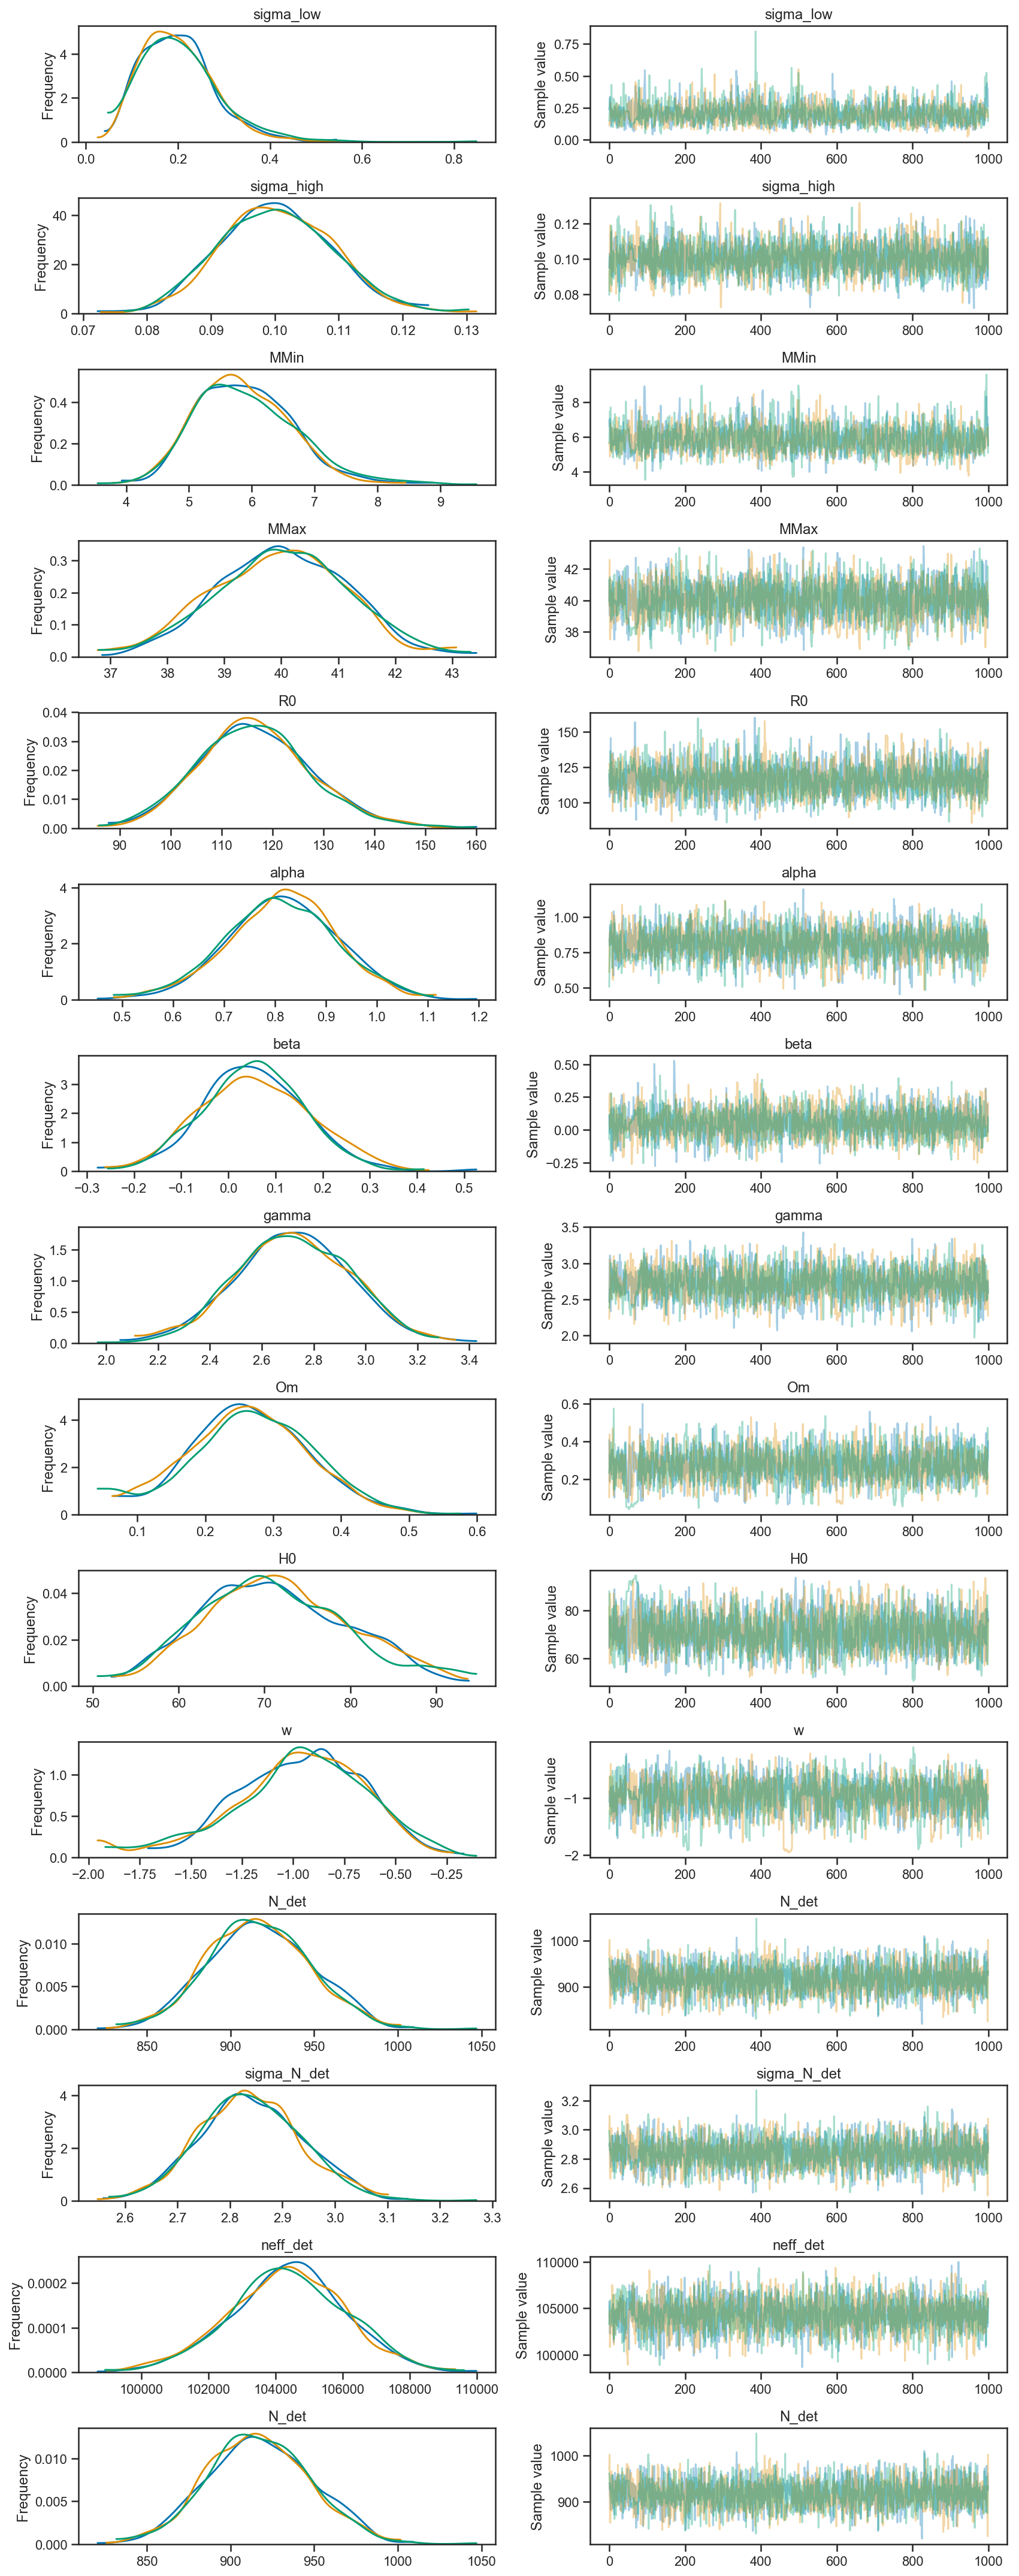

In [41]:
pm.traceplot(t2)

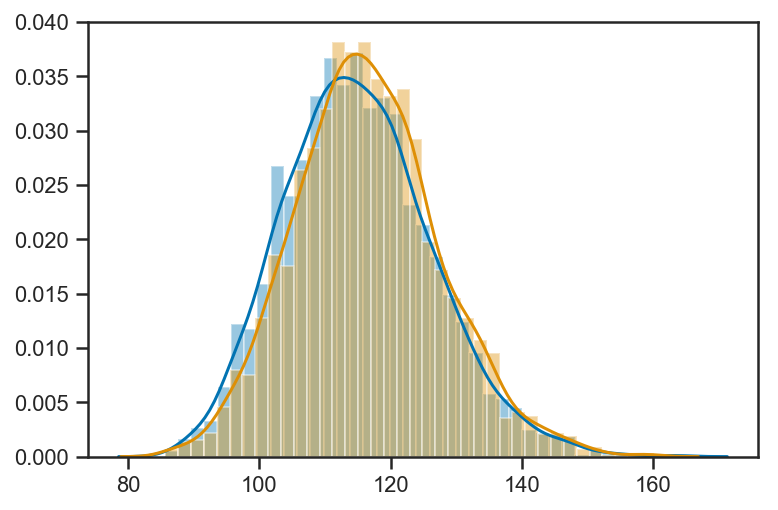

In [47]:
sns.distplot(t1['R0'])
sns.distplot(t2['R0'])

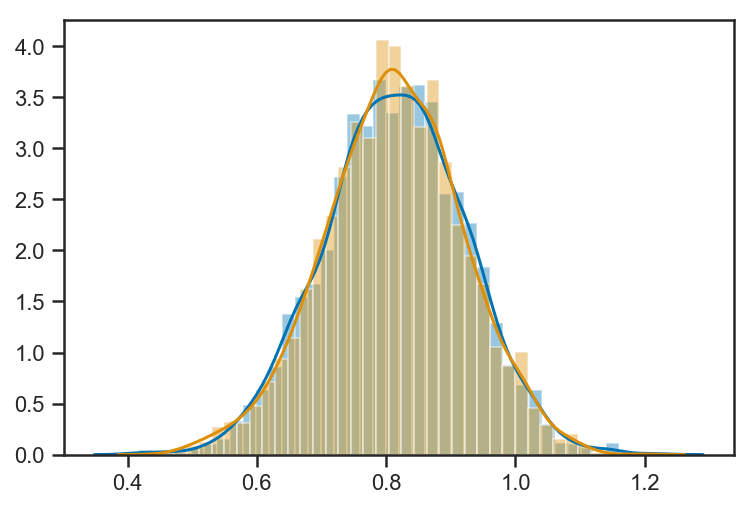

In [42]:
sns.distplot(t1['alpha'])
sns.distplot(t2['alpha'])

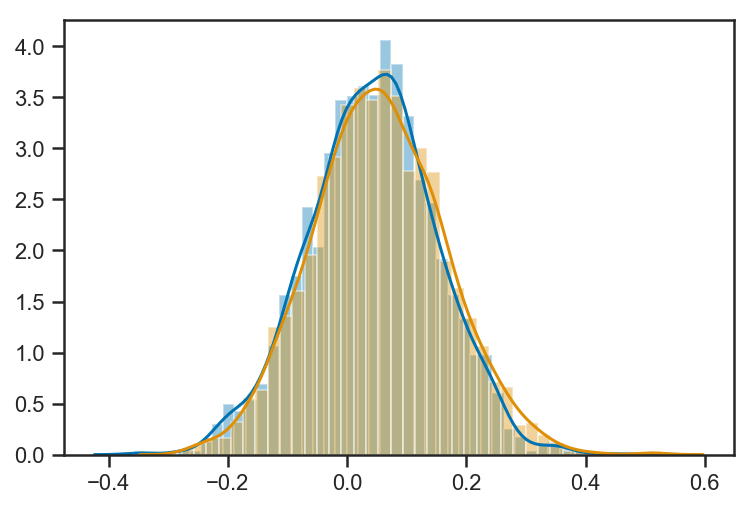

In [43]:
sns.distplot(t1['beta'])
sns.distplot(t2['beta'])

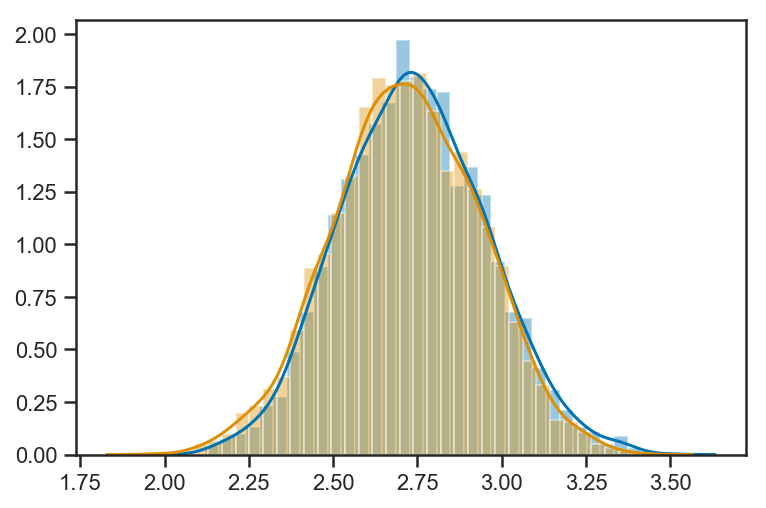

In [44]:
sns.distplot(t1['gamma'])
sns.distplot(t2['gamma'])

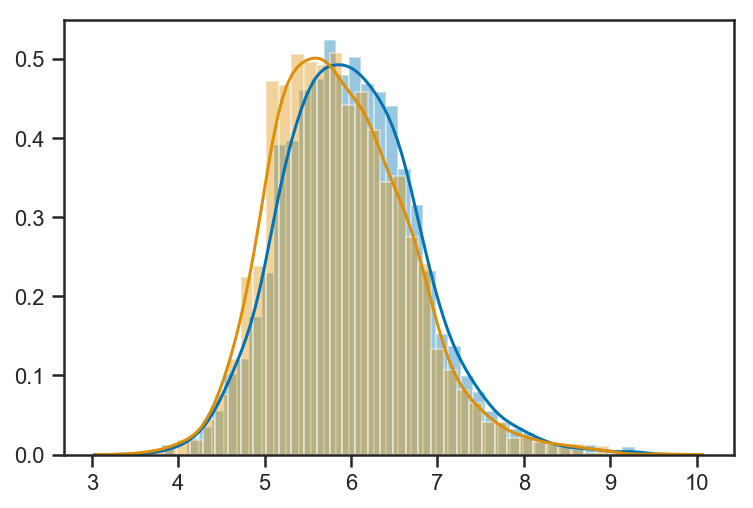

In [45]:
sns.distplot(t1['MMin'])
sns.distplot(t2['MMin'])

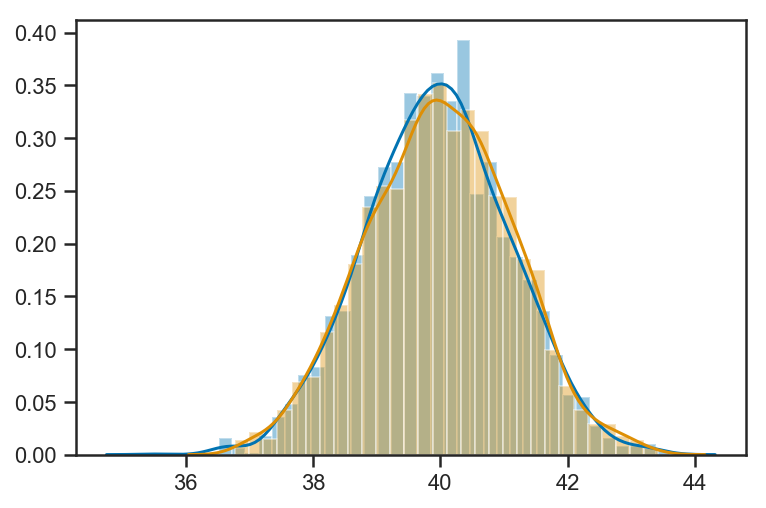

In [46]:
sns.distplot(t1['MMax'])
sns.distplot(t2['MMax'])

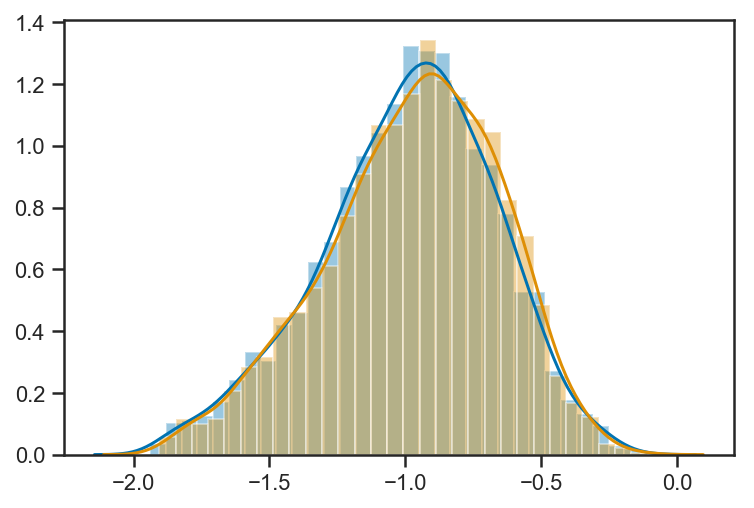

In [31]:
sns.distplot(t1['w'])
sns.distplot(t2['w'])

In [48]:
mean(t1['neff_det']), mean(t2['neff_det'])

(52473.9820136232, 104337.92796001337)